In [1]:
import cv2
from matplotlib import pyplot as plt
import math
import numpy as np
import glob

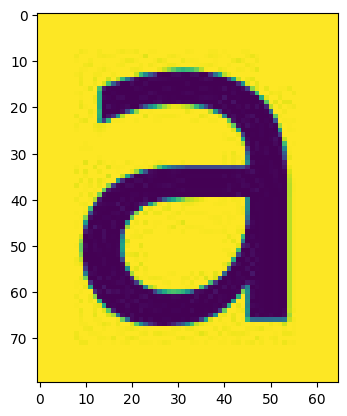

In [2]:
# Showing the image.
im = cv2.imread("a.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(im)
plt.show()

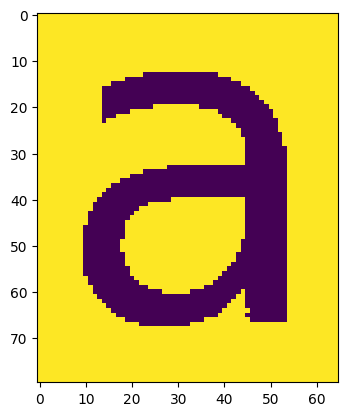

In [3]:
# Getting the binary threshold of the image.
_, threshim = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)

plt.imshow(threshim)
plt.show()

In [4]:
#Regular moments
moments = cv2.moments(threshim)
#HuMoments
huMoments = cv2.HuMoments(moments).flatten()

print("Here are regular moments:")
print(moments)
print("")
print("Here are HuMoments:")
print(huMoments)

Here are regular moments:
{'m00': 1006230.0, 'm10': 31560075.0, 'm01': 39092520.0, 'm20': 1398108135.0, 'm11': 1227219120.0, 'm02': 2137881750.0, 'm30': 70047706185.0, 'm21': 54397199250.0, 'm12': 67470202140.0, 'm03': 132089041200.0, 'mu20': 408236700.0342119, 'mu11': 1095010.065889526, 'mu02': 619118524.9417131, 'mu30': 588080313.8029748, 'mu21': 11335750.342208793, 'mu12': 331156616.67708325, 'mu03': 925200222.4711627, 'nu20': 0.0004031972135008632, 'nu11': 1.0814926910908636e-06, 'nu02': 0.0006114758032835942, 'nu30': 5.790198974781946e-07, 'nu21': 1.1161103078827366e-08, 'nu12': 3.26054563870049e-07, 'nu03': 9.109458782895677e-07}

Here are HuMoments:
[ 1.01467302e-03  4.33846495e-08  9.29256328e-13  1.66944107e-12
 -6.74827750e-25  1.00922922e-17  1.96678426e-24]


In [7]:
# Getting the log10 of the HuMoments to make it readable.

for i in range(0,7):
    huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))

huMoments

array([-0.47620449, -0.86703498, -1.08033293, -1.07105049,  1.38329115,
       -1.23034698, -1.37486274])

---
## Image cutting tests

In [9]:
def display_image(img, title="image"):
    """
    Code that displays the image.
    """
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

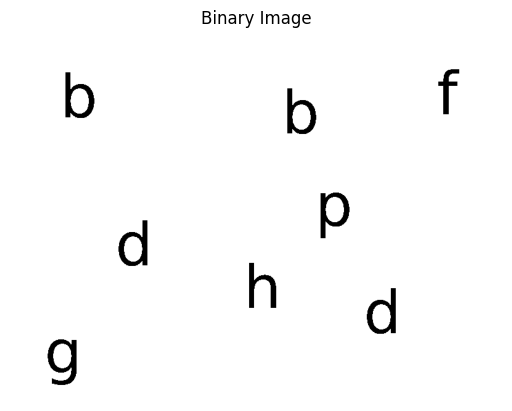

In [10]:
im2 = cv2.imread("testimage.jpg")
gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
_, threshim2 = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

display_image(threshim2, "Binary Image")

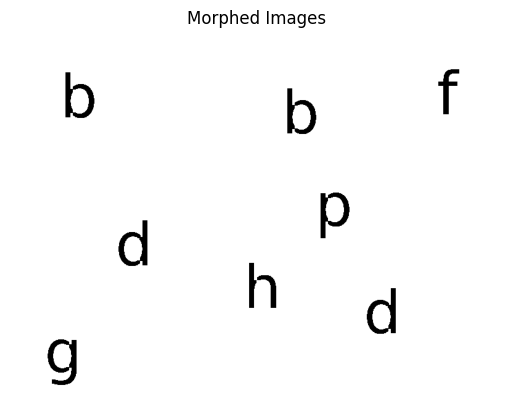

In [11]:
#Testing using morphs.

kernel = np.ones((3,3), np.uint8)
morphed = cv2.morphologyEx(threshim2, cv2.MORPH_CLOSE, kernel, iterations=2)
morphed = cv2.morphologyEx(morphed, cv2.MORPH_OPEN, kernel, iterations=1)

display_image(morphed, "Morphed Images")

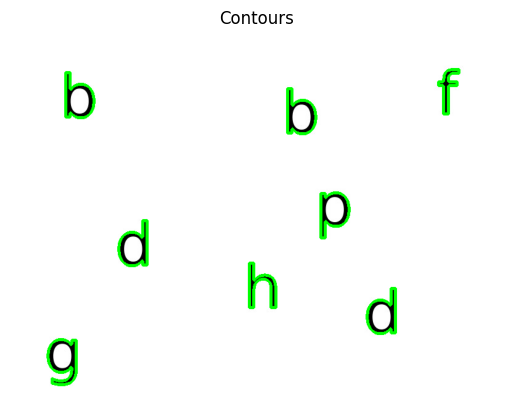

In [12]:
#Finding contours

#First we invert colors
invert_im = cv2.bitwise_not(threshim2)

contours, _ = cv2.findContours(invert_im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = im2.copy()
cv2.drawContours(contour_img, contours, -1, (0,255,0), 3)

display_image(contour_img, "Contours")

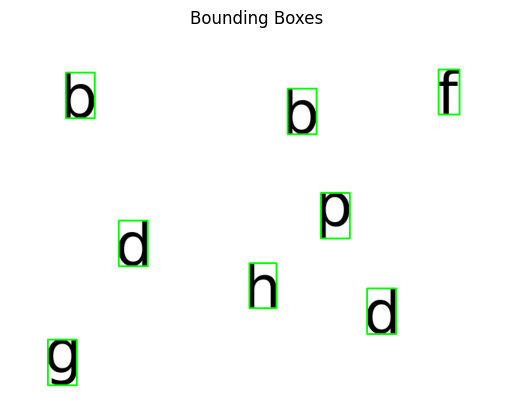

In [13]:
#Creating bounding boxes
bounding_box_img = im2.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(bounding_box_img, (x,y), (x+w,y+h), (0,255,0), 2)

display_image(bounding_box_img, "Bounding Boxes")

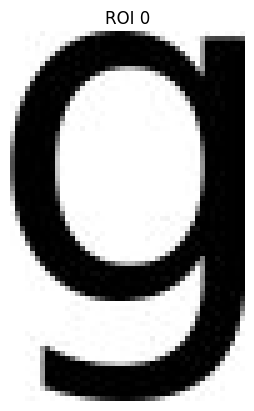

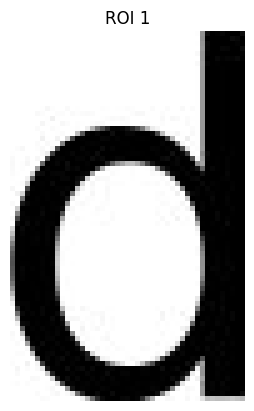

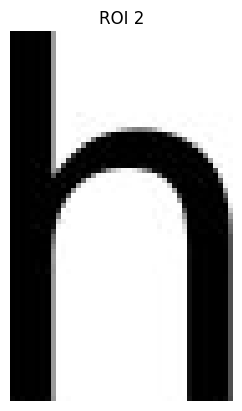

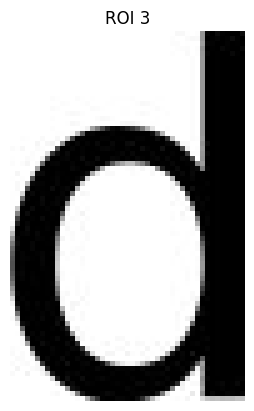

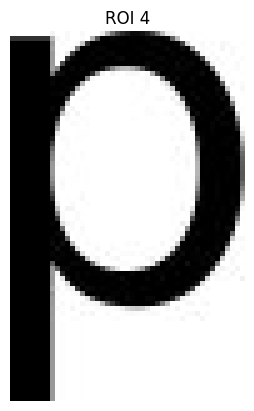

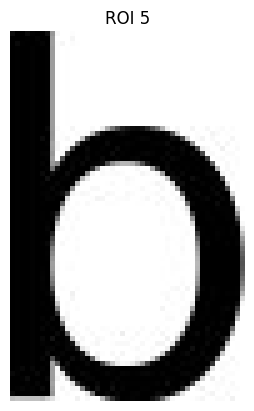

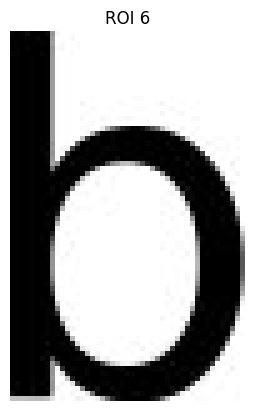

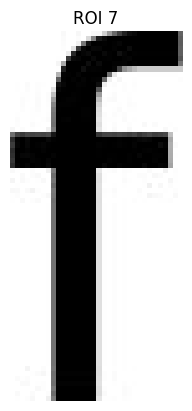

In [14]:
# Extract all the letters from the larger image.

for i, cnt in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cnt)
    roi = im2[y:y+h, x:x+w]

    cv2.imwrite(f'roi_{i}.png', roi)
    display_image(roi, f'ROI {i}')

---

## Testing for variations of same letter

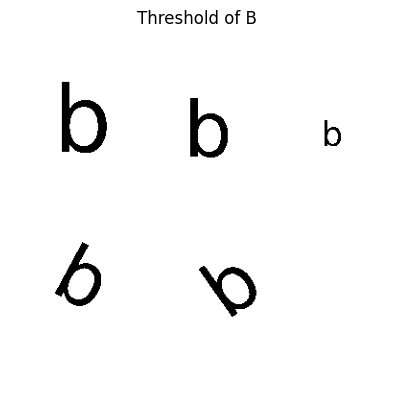

In [39]:
b_image = cv2.imread("bs.jpg")
gray_b = cv2.cvtColor(b_image, cv2.COLOR_BGR2GRAY)
_, thresh_b = cv2.threshold(gray_b, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

display_image(thresh_b, "Threshold of B")

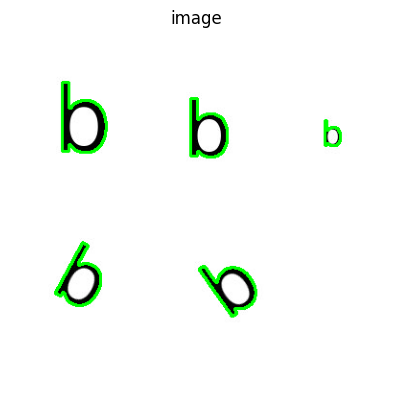

In [40]:
invert_b = cv2.bitwise_not(thresh_b)
contours_b, _ =cv2.findContours(invert_b, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = b_image.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

display_image(contour_img)

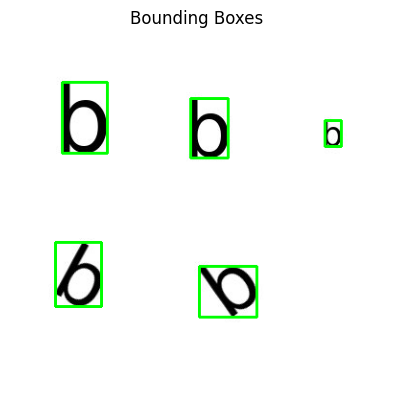

In [41]:
bounding_box_img = b_image.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(bounding_box_img, (x,y), (x+w,y+h), (0,255,0), 2)

display_image(bounding_box_img, "Bounding Boxes")

In [44]:
for i, cnt in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cnt)
    roi = b_image[y:y+h, x:x+w]

    cv2.imwrite(f'roi_{i}.png', roi)

In [71]:
#Calculating HuMoments for all the b images

b_moments = []
images = glob.glob("roi*.png")
images.sort()

for image in images:
    print("Calculating moments: ", image)
    b_im = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    moments = cv2.moments(b_im)
    huMoments = cv2.HuMoments(moments).flatten()

    b_moments.append(huMoments)

    print("Calculated!")
    print("")

print(b_moments)

Calculating moments:  roi_0.png
Calculated!

Calculating moments:  roi_1.png
Calculated!

Calculating moments:  roi_2.png
Calculated!

Calculating moments:  roi_3.png
Calculated!

Calculating moments:  roi_4.png
Calculated!

[array([ 1.01419908e-03,  2.58674193e-08,  5.81335178e-12,  4.67908336e-12,
       -2.27654047e-23,  7.14556120e-16, -8.79054165e-24]), array([1.06480571e-03, 1.09245427e-07, 1.94041637e-11, 6.77314766e-12,
       6.53523291e-23, 2.04658609e-15, 4.19329044e-23]), array([1.12543810e-03, 4.41957373e-07, 2.86816776e-11, 1.05023946e-11,
       1.40993500e-22, 3.98086169e-15, 1.15525676e-22]), array([1.14270960e-03, 4.68665778e-07, 2.25826112e-11, 1.49169900e-11,
       2.53128949e-22, 7.66704319e-15, 1.04324946e-22]), array([1.11947157e-03, 4.35080687e-07, 2.05109697e-11, 1.47275046e-11,
       1.84712016e-22, 5.48032651e-15, 1.77204520e-22])]


In [72]:
import pretty_tables

headers = ["Hu1", "Hu2", "Hu3", "Hu4", "Hu5", "Hu6", "Hu7"]

for row in b_moments:
    for i in range(0,7):
        row[i] = round(-1* math.copysign(1.0, row[i]) * math.log10(abs(row[i])), 3)

rows = [arr.tolist() for arr in b_moments]
colors= [
    pretty_tables.Colors.red,
    pretty_tables.Colors.yellow,
    pretty_tables.Colors.green,
    pretty_tables.Colors.blue,
    pretty_tables.Colors.cyan,
    pretty_tables.Colors.purple,
    pretty_tables.Colors.bold
]

table = pretty_tables.create(
    headers=headers,
    rows=rows,
    colors=colors
)

print(table)

| Hu1   | Hu2   | Hu3    | Hu4    | Hu5     | Hu6    | Hu7     |
| ----- | ----- | ------ | ------ | ------- | ------ | ------- |
| 2.994 | 7.587 | 11.236 | 11.33  | -22.643 | 15.146 | -23.056 |
| 2.973 | 6.962 | 10.712 | 11.169 | 22.185  | 14.689 | 22.377  |
| 2.949 | 6.355 | 10.542 | 10.979 | 21.851  | 14.4   | 21.937  |
| 2.942 | 6.329 | 10.646 | 10.826 | 21.597  | 14.115 | 21.982  |
| 2.951 | 6.361 | 10.688 | 10.832 | 21.734  | 14.261 | 21.752  |
